In [15]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv(r'D:/data_science/Research/16.csv')

In [17]:
df.head(2)


,type,time,sender,attackerType,messageID,pos/0,pos/1,pos/2,pos_noise/0,pos_noise/1,pos_noise/2,spd/0,spd/1,spd/2,spd_noise/0,spd_noise/1,spd_noise/2
0,4,25200.006694,331,0,973,5409.774101,5794.384047,1.895,0,0,0,-1.181680e+01,-3.873119e+00,0,0,0,0
1,4,25200.008074,967,0,1222,4432.548015,5295.893829,1.895,0,0,0,-4.185271e-14,2.025677e-14,0,0,0,0


In [18]:
df['attackerType'].value_counts()

0     14130
16     6352
Name: attackerType, dtype: int64

In [19]:
df.drop(['type','pos_noise/0','pos_noise/1','pos_noise/2','spd_noise/2','spd_noise/1','spd_noise/0','spd/2'],axis = 1, inplace = True)

In [20]:
x = df[['time','sender','messageID','pos/0','pos/1','pos/2','spd/0','spd/1']]
y = df.iloc[:,2:3].values

In [21]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

In [22]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [23]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
#Building Model
from sklearn.tree import DecisionTreeClassifier
reg = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [25]:
#checking Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.69%


[[3539  136]
 [ 260 3518]]


C:\Users\Jayesh\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1, 'Decsion Tree')

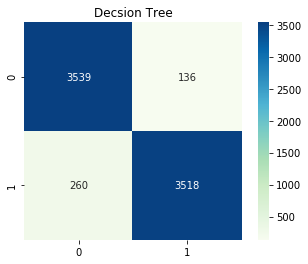

In [29]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
print(con)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
ax.set_title('Decsion Tree')


In [27]:
from sklearn.metrics import classification_report
print('Decision Tree')
print(classification_report(y_test, y_pred))

Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      3675
          16       0.96      0.93      0.95      3778

    accuracy                           0.95      7453
   macro avg       0.95      0.95      0.95      7453
weighted avg       0.95      0.95      0.95      7453



[0. 0. 1. ... 1. 0. 0.]
Logistic : ROC AUC = 0.947


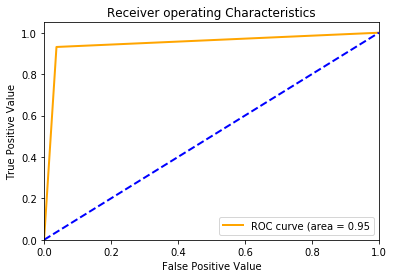

In [28]:
#ROC and AUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_probs = reg.predict_proba(x_test)
clf_probs = clf_probs[:,1]
print(clf_probs)
ras = roc_auc_score(y_test,clf_probs)
print("Logistic : ROC AUC = %.3f" %(ras))
from sklearn.preprocessing import label_binarize
y = label_binarize(y_test,classes = [0,16])
n_classes = y.shape[1]
fpr,tpr,_ = roc_curve(y,clf_probs)
plt.figure()
lw = 2
plt.plot(fpr,tpr, color = "orange", lw = lw, label = "ROC curve (area = %0.2f" % ras)
plt.plot([0,1],[0,1], color = "blue",lw = lw, linestyle = '--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Value')
plt.ylabel('True Positive Value')
plt.title('Receiver operating Characteristics')
plt.legend(loc = "lower right")
plt.show()